# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import re

# Read the data

In [2]:
data = pd.read_csv('data/IMDB Dataset.csv')
pd.set_option('max_colwidth', 500)
data.head(5)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly wr...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />T...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ru...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is conne...",positive


# Explore and clean the data

In [3]:
data.info()
#data.dropna(inplace=True) # if there are null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# duplicated reviews
data["review"].duplicated(keep="first").value_counts()

False    49582
True       418
Name: review, dtype: int64

In [5]:
# delete duplicate reviews
data.drop_duplicates(subset="review", keep="first", inplace=True ,ignore_index=True)
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...",positive
freq,1,24884


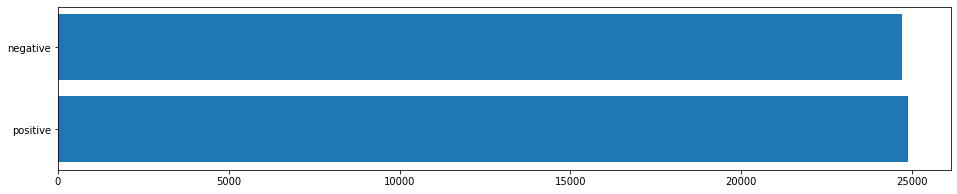

In [6]:
# see how much data there is of each type
sentiment_counts = data["sentiment"].value_counts()

# size of fig
fig, ax = plt.subplots(figsize =(16, 3))

plt.barh(sentiment_counts.keys(), sentiment_counts.values)
plt.show()

# Process the data

In [7]:
# Libreries
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [8]:
# Process the text
ps = PorterStemmer()
filter_words = set(stopwords.words('english')) # words that are not important

def text_process(text):
    text = text.lower() # characters to lowercase
    text = re.sub('[^a-z ]',"",text) # only alphabetic characters
    text = word_tokenize(text, language='english') # convert text into list
    text = [word for word in text if not word in filter_words] # only important words
    text = " ".join(text) # join the text
    return text  

text_list = data["review"].apply(text_process)
text_list = list(text_list)


print("Before")
print(data["review"][2])
print("After")
print(text_list[2])

Before
I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.
After
thought wonderful way spend time hot summer weekend sitting 

In [9]:
# prepare variable y
le = LabelEncoder()
le_fit = le.fit(data["sentiment"])  
y_transform = le_fit.transform(data["sentiment"]) # convert list of texts into list of numbers like [0, 1, 1, 0, ...]

y = y_transform.reshape(-1, 1).astype(np.float) # convert list [0, 1, 1, 0, ...] into list of lists [[0], [1], [1], [0], ...]

In [10]:
# prepare variable X
tfidv = TfidfVectorizer(max_features=20000) 
tfidv_fit = tfidv.fit(text_list)
x = tfidv_fit.transform(text_list) # convert a collection of raw documents to a matrix of TF-IDF features
x.sort_indices()

In [11]:
# split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=50) 

# ANN Artificial Neural Network

In [12]:
# Librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import seaborn as sns

In [13]:
# Model
def consrtuct_ann_model():
    model = Sequential()
    
    # Layers
    model.add(Dense(units = 1024, activation = 'relu', input_dim = x_train.shape[1]))

    model.add(Dense(units = 1024, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=512, kernel_initializer = 'uniform', activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(units=256, kernel_initializer = 'uniform', activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(units=128, kernel_initializer = 'uniform', activation="relu"))
    model.add(Dropout(0.3))
    
    model.add(Dense(units=1, kernel_initializer = 'uniform', activation="sigmoid"))
    
    return model

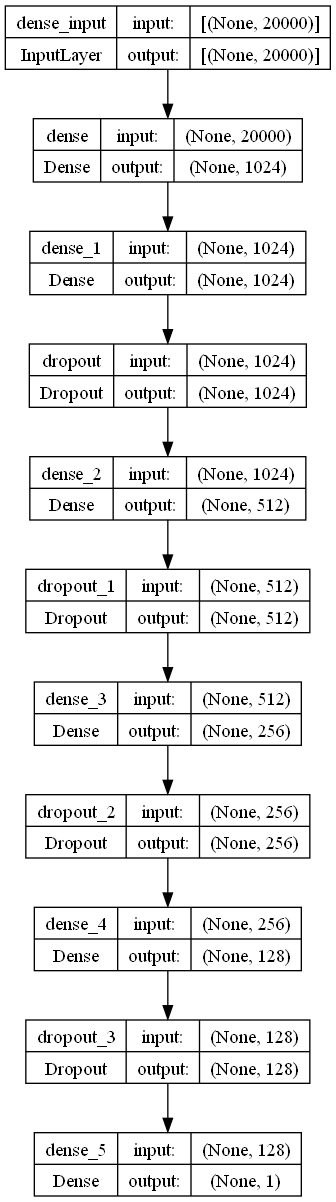

In [14]:
# See the model
plot_model(consrtuct_ann_model(), show_shapes=True)

In [16]:
# fit the model using different parameters to choose the best one
ann_model = KerasClassifier(model=consrtuct_ann_model, loss=mean_squared_error, optimizer=Adam, epochs=5, batch_size=32, verbose=0)

# define the grid search parameters
beta_1 = [0.05, 0.5, 0.9]
beta_2 = [0.05, 0.5, 0.9]
param_grid = dict(optimizer__beta_1=beta_1, optimizer__beta_2=beta_2)
grid = GridSearchCV(estimator=ann_model, param_grid=param_grid, n_jobs=-1, cv=3)
# the parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881219 using {'optimizer__beta_1': 0.05, 'optimizer__beta_2': 0.05}
0.881219 (0.002234) with: {'optimizer__beta_1': 0.05, 'optimizer__beta_2': 0.05}
0.880520 (0.000202) with: {'optimizer__beta_1': 0.05, 'optimizer__beta_2': 0.5}
0.877212 (0.001666) with: {'optimizer__beta_1': 0.05, 'optimizer__beta_2': 0.9}
0.499462 (0.001550) with: {'optimizer__beta_1': 0.5, 'optimizer__beta_2': 0.05}
0.878799 (0.001409) with: {'optimizer__beta_1': 0.5, 'optimizer__beta_2': 0.5}
0.876298 (0.000728) with: {'optimizer__beta_1': 0.5, 'optimizer__beta_2': 0.9}
0.499435 (0.001540) with: {'optimizer__beta_1': 0.9, 'optimizer__beta_2': 0.05}
0.498360 (0.000019) with: {'optimizer__beta_1': 0.9, 'optimizer__beta_2': 0.5}
0.873743 (0.003588) with: {'optimizer__beta_1': 0.9, 'optimizer__beta_2': 0.9}


In [17]:
# predict the test data
y_pred = grid.predict(x_test).round()

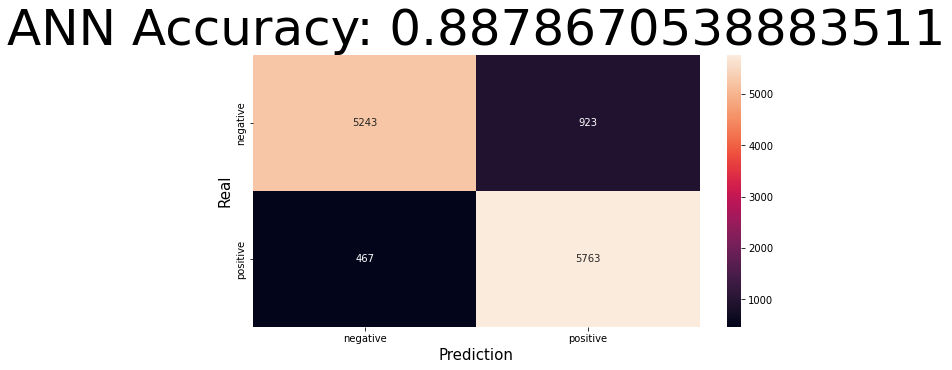

In [18]:
# calculate accuracy of class predictions
ann_accuracy = accuracy_score(y_test.flatten(), y_pred.flatten())
# calculate the confusion matrix
ann_confusion_matrix = confusion_matrix(y_test.flatten(), y_pred.flatten())

# visualize
plt.subplots(figsize=(10,5))
sns.heatmap(ann_confusion_matrix, annot=True, fmt="1d", cbar=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("ANN Accuracy: {}".format(ann_accuracy),fontsize=50)
plt.xlabel("Prediction",fontsize=15)
plt.ylabel("Real",fontsize=15)
plt.show()